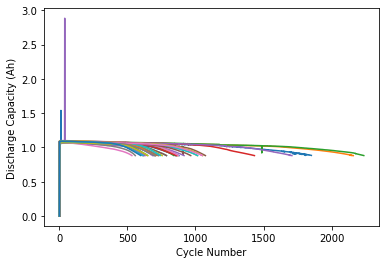

In [1]:
#LoadBatch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
batch1 = pickle.load(open(r'C:\Users\satsin\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']
numBat1 = len(batch1.keys())
batch2 = pickle.load(open(r'C:\Users\satsin\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482]
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']
numBat2 = len(batch2.keys())
batch3 = pickle.load(open(r'C:\Users\satsin\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']
numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch1}
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

#Batch_1 = pd.DataFrame(data=batch1)
#Batch_1.to_excel('summary1.xlsx')
#Batch_2 = pd.DataFrame(data=batch2)
#Batch_2.to_excel('summary2.xlsx')
#Batch_3 = pd.DataFrame(data=batch3)
#Batch_3.to_excel('summary3.xlsx')

test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat)

In [3]:
for i in bat_dict.keys():
    print(bat_dict[i]['summary']['cycle'][99], bat_dict[i]['summary']['QD'][99])

100.0 1.075726
100.0 1.0804451
100.0 1.0846714
100.0 1.0843184
100.0 1.0824925
100.0 1.0795447
100.0 1.0787548
100.0 1.0954001
100.0 1.087405
100.0 1.0593685
100.0 1.0754719
100.0 1.0670444
100.0 1.085688
100.0 1.0766997
100.0 1.0641898
100.0 1.0869354
100.0 1.0606098
100.0 1.0757223
100.0 1.0814841
100.0 1.0773886
100.0 1.077424
100.0 1.0894202
100.0 1.0810453
100.0 1.0788379
100.0 1.0815731
100.0 1.0811175
100.0 1.0950044
100.0 1.0789968
100.0 1.0933089
100.0 1.0793046
100.0 1.0738658
100.0 1.0799665
100.0 1.0766187
100.0 1.0750053
100.0 1.0847294
100.0 1.0858712
100.0 1.0821786
100.0 1.083336
100.0 1.0686842
100.0 1.0846453
100.0 1.0855405
100.0 1.075726
100.0 1.0804451
100.0 1.0846714
100.0 1.0843184
100.0 1.0824925
100.0 1.0795447
100.0 1.0787548
100.0 1.0809214
100.0 1.0593685
100.0 1.0815079
100.0 1.0834142
100.0 1.0754719
100.0 1.0766997
100.0 1.0641898
100.0 1.0869354
100.0 1.0606098
100.0 1.0757223
100.0 1.0817369
100.0 1.0814841
100.0 1.0773886
100.0 1.077424
100.0 1.0894202

In [10]:
for i in bat_dict.keys():
    print(bat_dict[i]['summary']['QD'][99]-bat_dict[i]['summary']['QD'][9])

0.0013753000000000792
0.000853100000000051
0.001158699999999957
0.00044200000000005346
0.0006920999999999733
-0.0003965999999999692
-0.0018586000000000436
-0.0018245000000001177
0.0009996999999999368
0.0018716000000000843
0.000999500000000042
0.001147500000000079
0.0005359000000000336
0.0012254000000000431
-0.005023800000000023
-0.0015537000000001022
-0.014476399999999945
-0.009073200000000003
-0.0009636000000001754
-7.259999999997824e-05
-0.0003018999999999661
-0.0016640999999999462
-0.001266699999999954
-0.0012768000000000779
-0.00098240000000005
-0.001953399999999883
-0.0027898000000001755
-0.0016681999999998975
-0.002425699999999864
-0.00040940000000011523
-0.00013669999999987859
-0.001297899999999963
-0.001513400000000109
-0.0010924999999999407
-0.0008420000000000094
-0.0014332999999999707
-0.0005790000000001072
-0.0004695000000001226
-0.002598499999999948
-0.0035061000000000675
-0.0016899999999999693
0.0013753000000000792
0.000853100000000051
0.001158699999999957
0.00044200000000

In [12]:
for i in bat_dict.keys():
    print(bat_dict[i]['summary']['QD'][9])

1.0745373
1.0797766
1.0837817
1.0843078
1.0819536
1.080176
1.0811012
1.097587
1.0866315
1.0581003
1.0752021
1.0666022
1.0857847
1.0757509
1.0695512
1.0886388
1.0757242
1.0858023
1.0826545
1.077704
1.0783457
1.0910354
1.0822893
1.0809715
1.0827931
1.0833608
1.0981392
1.0810486
1.0961914
1.0798281
1.0741303
1.081539
1.0783199
1.0760679
1.0856049
1.0871686
1.0827476
1.0837516
1.0714344
1.0882163
1.0875177
1.0745373
1.0797766
1.0837817
1.0843078
1.0819536
1.080176
1.0811012
1.0795403
1.0581003
1.081143
1.0836941
1.0752021
1.0757509
1.0695512
1.0886388
1.0757242
1.0858023
1.0830258
1.0826545
1.077704
1.0783457
1.0910354
1.0822893
1.0809715
1.0827931
1.0833608
1.0981392
1.0810486
1.0961914
1.0798281
1.0741303
1.081539
1.0783199
1.0760679
1.0856049
1.0871686
1.0827476
1.0837516
1.0714344
1.0882163
1.0875177
1.0745373
1.0797766
1.0843078
1.0819536
1.080176
1.0811012
1.097587
1.0941397
1.0866315
1.0795403
1.0581003
1.081143
1.0836941
1.0752021
1.0666022
1.0857847
1.0757509
1.0695512
1.0886388
1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
data = pd.read_excel('C:/Users/satsin/Desktop/Battery life/extracted files/extracted_data.xlsx',sheet_name ='Training_1')

In [3]:
data.head()

Qc100-Qc10  Cycle_life     Qc100      Qc10   Charge_policy  Qd100-Qd10  \
0    0.001109        2237  1.084671  1.083562  3.6C(80%)-3.6C    0.001159   
1    0.000879        2160  1.080445  1.079566  3.6C(80%)-3.6C    0.000853   
2    0.001373        1852  1.075726  1.074353  3.6C(80%)-3.6C    0.001375   
3    0.000709        1709  1.082493  1.081784      4C(80%)-4C    0.000692   
4    0.000479        1434  1.084318  1.083840      4C(80%)-4C    0.000442   

      Qd100      Qd10  
0  1.084940  1.083782  
1  1.080630  1.079777  
2  1.075913  1.074537  
3  1.082646  1.081954  
4  1.084750  1.084308

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qc100-Qc10     122 non-null    float64
 1   Cycle_life     122 non-null    int64  
 2   Qc100          122 non-null    float64
 3   Qc10           122 non-null    float64
 4   Charge_policy  122 non-null    object 
 5   Qd100-Qd10     122 non-null    float64
 6   Qd100          122 non-null    float64
 7   Qd10           122 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.8+ KB


In [5]:
data.nunique()

Qc100-Qc10       46
Cycle_life       49
Qc100            46
Qc10             46
Charge_policy    23
Qd100-Qd10       46
Qd100            46
Qd10             46
dtype: int64

In [6]:
data.isnull().sum()

Qc100-Qc10       0
Cycle_life       0
Qc100            0
Qc10             0
Charge_policy    0
Qd100-Qd10       0
Qd100            0
Qd10             0
dtype: int64

In [7]:
data.describe()

Qc100-Qc10   Cycle_life       Qc100        Qc10  Qd100-Qd10  \
count  122.000000   122.000000  122.000000  122.000000  122.000000   
mean    -0.003847   870.344262    1.080059    1.083905   -0.001251   
std      0.016566   277.871716    0.007718    0.015604    0.002870   
min     -0.106257   534.000000    1.059368    1.057595   -0.014476   
25%     -0.001848   703.000000    1.076700    1.077980   -0.001685   
50%     -0.001143   855.500000    1.080983    1.082463   -0.000968   
75%      0.000479   917.000000    1.084645    1.085698    0.000442   
max      0.002092  2237.000000    1.095400    1.170447    0.002100   

            Qd100        Qd10  
count  122.000000  122.000000  
mean     1.080363    1.081614  
std      0.007641    0.007473  
min      1.059972    1.058100  
25%      1.076976    1.077858  
50%      1.081023    1.081954  
75%      1.084750    1.085740  
max      1.095762    1.098139

In [8]:
Training_1 = data.corr()

In [9]:
Training_1

Qc100-Qc10  Cycle_life     Qc100      Qc10  Qd100-Qd10     Qd100  \
Qc100-Qc10    1.000000    0.178207  0.354006 -0.886573    0.371882  0.355581   
Cycle_life    0.178207    1.000000  0.204606 -0.087995    0.454768  0.201836   
Qc100         0.354006    0.204606  1.000000  0.118781    0.251166  0.999481   
Qc10         -0.886573   -0.087995  0.118781  1.000000   -0.270585  0.116852   
Qd100-Qd10    0.371882    0.454768  0.251166 -0.270585    1.000000  0.245589   
Qd100         0.355581    0.201836  0.999481  0.116852    0.245589  1.000000   
Qd10          0.220758    0.031734  0.925463  0.223380   -0.132901  0.928136   

                Qd10  
Qc100-Qc10  0.220758  
Cycle_life  0.031734  
Qc100       0.925463  
Qc10        0.223380  
Qd100-Qd10 -0.132901  
Qd100       0.928136  
Qd10        1.000000

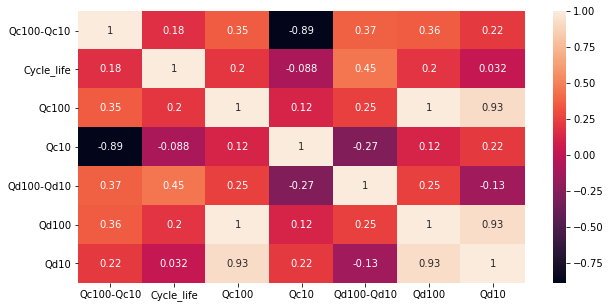

In [10]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(Training_1, annot=True)
plt.show()

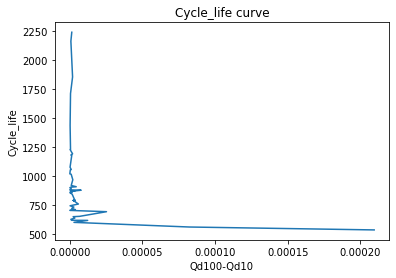

In [11]:
plt.plot((data['Qd100-Qd10'])**2,data['Cycle_life'])
plt.xlabel('Qd100-Qd10')
plt.ylabel('Cycle_life')
plt.title('Cycle_life curve')
plt.show()

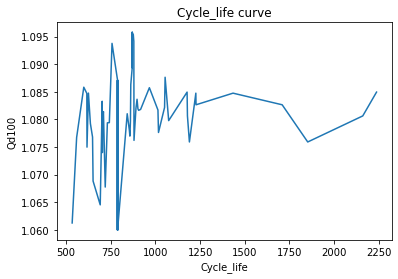

In [12]:
plt.plot(data['Cycle_life'],(data['Qd100']))
plt.xlabel('Cycle_life')
plt.ylabel('Qd100')
plt.title('Cycle_life curve')
plt.show()

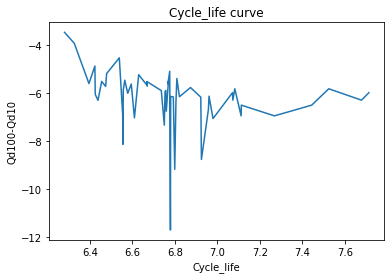

In [13]:
plt.plot(np.log(data['Cycle_life']),np.log(abs((data['Qd100'])**2-(data['Qd10'])**2)))
#plt.plot(data['Cycle_life'],(data['Qd100'])-(data['Qd10']))
plt.xlabel('Cycle_life')
plt.ylabel('Qd100-Qd10')
plt.title('Cycle_life curve')
plt.show()

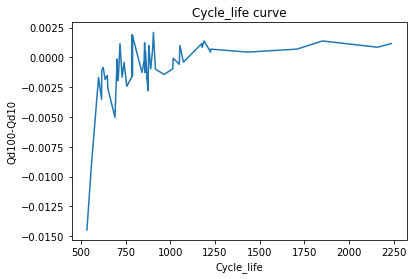

In [14]:
plt.plot(data['Cycle_life'],(data['Qd100'])-(data['Qd10']))
plt.xlabel('Cycle_life')
plt.ylabel('Qd100-Qd10')
plt.title('Cycle_life curve')
plt.show()

In [17]:
df1 = pd.DataFrame(data['Cycle_life'],data['Qd100'],data['Qd10'])

In [18]:
a = np.array(np.log(data['Cycle_life']),np.log(abs((data['Qd100'])**2-(data['Qd10'])**2)))

In [20]:
df = pd.DataFrame(np.log(data['Cycle_life']),np.log(abs((data['Qd100'])**2-(data['Qd10'])**2)))

In [21]:
df = pd.DataFrame(np.log(data['Cycle_life']),np.log(abs((data['Qd100'])**2-(data['Qd10'])**2)))

In [22]:
df = pd.DataFrame(np.log(data['Cycle_life']),np.log(((abs((data['Qd100'])**2-(data['Qd10'])**2)))**0.5))

In [26]:
df.head()

Cycle_life
-2.993159         NaN
-3.148169         NaN
-2.911703         NaN
-3.251772         NaN
-3.474954         NaN

In [24]:
df1 = df.transpose()

In [27]:
df.corr()

Cycle_life
Cycle_life         NaN

In [127]:
data1 = pd.read_excel('C:/Users/satsin/Desktop/Battery life/extracted files/summary1.xlsx',sheet_name ='Sheet1')

In [128]:
data1.head()

Unnamed: 0                                               b1c0  \
0     cycle_life                                          [[1852.]]   
1  charge_policy                                     3.6C(80%)-3.6C   
2        summary  {'IR': array([0.        , 0.01674235, 0.016724...   
3         cycles  {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...   

                                                b1c1  \
0                                          [[2160.]]   
1                                     3.6C(80%)-3.6C   
2  {'IR': array([0.        , 0.01703883, 0.017009...   
3  {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...   

                                                b1c2  \
0                                          [[2237.]]   
1                                     3.6C(80%)-3.6C   
2  {'IR': array([0.        , 0.01686798, 0.016831...   
3  {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...   

                                                b1c3  \
0                                          [[1434.]]   
1                                         4C(80%)-4C   
2  {'IR': array([0.        , 0.0163697 , 0.016315...   
3  {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...   

                                                b1c4  \
0                                          [[1709.]]   
1                                         4C(80%)-4C   
2  {'IR': array([0.        , 0.01678743, 0.016740...   
3  {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...   

                                                b1c5  \
0                                          [[1074.]]   
1                                     4.4C(80%)-4.4C   
2  {'IR': array([0.        , 0.01643758, 0.016396...   
3  {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...   

                                                b1c6  \
0                                           [[636.]]   
1                                     4.8C(80%)-4.8C   
2  {'IR': array([0.        , 0.01700198, 0.016977...   
3  {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...   

                                                b1c7  \
0                                           [[870.]]   
1                                     4.8C(80%)-4.8C   
2  {'IR': array([0.        , 0.01631117, 0.016267...   
3  {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...   

                                                b1c9  ...  \
0                                          [[1054.]]  ...   
1                                     5.4C(40%)-3.6C  ...   
2  {'IR': array([0.        , 0.01697823, 0.016928...  ...   
3  {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...  ...   

                                               b1c36  \
0                                           [[704.]]   
1                                         7C(40%)-3C   
2  {'IR': array([0.        , 0.01648068, 0.016444...   
3  {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...   

                                               b1c37  \
0                                           [[648.]]   
1                                         7C(40%)-3C   
2  {'IR': array([0.        , 0.01660794, 0.016576...   
3  {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...   

                                               b1c38  \
0                                           [[617.]]   
1                                       7C(40%)-3.6C   
2  {'IR': array([0.        , 0.01626035, 0.016216...   
3  {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...   

                                               b1c39  \
0                                           [[625.]]   
1                                       7C(40%)-3.6C   
2  {'IR': array([0.        , 0.0167436 , 0.016682...   
3  {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...   

                                               b1c40  \
0                                           [[966.]]   
1                                       8C(15%)-3.6C   
2  {'IR': array([0.        , 0.01675647, 0.016708...   
3  {'0': {'I': array([0, 0], 

In [129]:
data2 = data1.transpose()

In [130]:
data2.head()

0               1  \
Unnamed: 0  cycle_life   charge_policy   
b1c0         [[1852.]]  3.6C(80%)-3.6C   
b1c1         [[2160.]]  3.6C(80%)-3.6C   
b1c2         [[2237.]]  3.6C(80%)-3.6C   
b1c3         [[1434.]]      4C(80%)-4C   

                                                            2  \
Unnamed: 0                                            summary   
b1c0        {'IR': array([0.        , 0.01674235, 0.016724...   
b1c1        {'IR': array([0.        , 0.01703883, 0.017009...   
b1c2        {'IR': array([0.        , 0.01686798, 0.016831...   
b1c3        {'IR': array([0.        , 0.0163697 , 0.016315...   

                                                            3  
Unnamed: 0                                             cycles  
b1c0        {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...  
b1c1        {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...  
b1c2        {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...  
b1c3        {'0': {'I': array([0, 0], dtype=uint64), 'Qc':...

In [131]:
for i in bat_dict.keys():
    print(bat_dict[i]['summary'])#, bat_dict[i]['summary']['QD'][99])

{'IR': array([0.        , 0.01674235, 0.01672431, ..., 0.01963393, 0.01972868,
       0.01994177]), 'QC': array([0.        , 1.0710422 , 1.0716741 , ..., 0.88457793, 0.88360709,
       0.88221848]), 'QD': array([0.        , 1.0706892 , 1.0719005 , ..., 0.88331425, 0.88245028,
       0.88110596]), 'Tavg': array([ 0.        , 31.87501078, 31.93149033, ..., 34.27871929,
       34.06455245, 33.83700355]), 'Tmin': array([ 0.      , 29.56613 , 29.604385, ..., 31.04146 , 30.772188,
       30.603159]), 'Tmax': array([ 0.      , 35.652016, 35.692978, ..., 39.301235, 39.097397,
       38.7817  ]), 'chargetime': array([ 0.        , 13.34125   , 13.42577667, ..., 18.781925  ,
       19.604985  , 20.58855833]), 'cycle': array([1.000e+00, 2.000e+00, 3.000e+00, ..., 2.056e+03, 2.057e+03,
       2.058e+03])}
{'IR': array([0.        , 0.01703883, 0.0170098 , ..., 0.01783509, 0.01784284,
       0.0178657 ]), 'QC': array([0.        , 1.0750588 , 1.0764499 , ..., 0.97069609, 0.9701339 ,
       0.96939099]

{'IR': array([0.        , 0.01657508, 0.01658227, 0.01658783, 0.01654546,
       0.01649128, 0.01641888, 0.01634066, 0.01624905, 0.01619639,
       0.01615019, 0.        , 0.01627095, 0.01612005, 0.01609675,
       0.01613729, 0.01611912, 0.01612317, 0.0161211 , 0.01613787,
       0.01614578, 0.0161309 , 0.01613066, 0.01613958, 0.01613645,
       0.01612369, 0.0161353 , 0.01613226, 0.01613771, 0.01615157,
       0.016161  , 0.01614411, 0.01612987, 0.01615559, 0.01612739,
       0.01612686, 0.01613225, 0.01613013, 0.0161381 , 0.01616139,
       0.01615055, 0.01615491, 0.01615254, 0.01613396, 0.01614036,
       0.01614146, 0.01614463, 0.01617066, 0.01616437, 0.01615686,
       0.01617387, 0.01617147, 0.0161679 , 0.01617612, 0.01618147,
       0.01618824, 0.01618865, 0.01619874, 0.01619713, 0.01619878,
       0.01620919, 0.01621128, 0.01620304, 0.01619853, 0.01617489,
       0.01608569, 0.01601676, 0.01597147, 0.0159628 , 0.01600425,
       0.01619899, 0.01619726, 0.01619152, 0.01619666, 

       716., 717., 718.])}
{'IR': array([0.        , 0.01683085, 0.01679108, 0.0167551 , 0.01671469,
       0.01668584, 0.01667733, 0.016661  , 0.01665505, 0.01664936,
       0.01665405, 0.01664719, 0.        , 0.01667167, 0.01664279,
       0.01664603, 0.01665547, 0.01664298, 0.01664646, 0.01665368,
       0.01663499, 0.01665798, 0.01665922, 0.01666396, 0.01666156,
       0.01665127, 0.0166602 , 0.01666014, 0.01665831, 0.01666994,
       0.01666193, 0.0166769 , 0.01667856, 0.0166768 , 0.0166818 ,
       0.01667185, 0.01667867, 0.01667204, 0.01667203, 0.0166711 ,
       0.01669453, 0.01668906, 0.01670046, 0.01669386, 0.01669059,
       0.01670191, 0.01670169, 0.01670083, 0.01668768, 0.01669496,
       0.01670059, 0.01670012, 0.01670023, 0.01670059, 0.01669073,
       0.01669978, 0.01670081, 0.01672312, 0.01670954, 0.01671164,
       0.0167206 , 0.01672387, 0.01671287, 0.01673069, 0.01672834,
       0.01672618, 0.01654484, 0.01643152, 0.01638423, 0.01634488,
       0.01632805, 0.0164593

{'IR': array([0.        , 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01593021, 0.01588503,
       0.01585087, 0.01584597, 0.01590126, 0.0159779 , 0.01597352,
       0.015942  , 0.0159422 , 0.0159522 , 0.015937  , 0.01593157,
       0.01593424, 0.01593324, 0.01593053, 0.01594258, 0.01593126,
       0.01591404, 0.01592747, 0.01593108, 0.01592388, 

{'IR': array([0.        , 0.01534877, 0.01527342, 0.01517543, 0.0151827 ,
       0.01512243, 0.01511262, 0.01509022, 0.01513493, 0.01505338,
       0.01506375, 0.01503293, 0.        , 0.01521857, 0.01500759,
       0.01507712, 0.01523438, 0.01510965, 0.01515983, 0.01514337,
       0.01510931, 0.01504445, 0.01513605, 0.01502455, 0.01500633,
       0.0150505 , 0.01501386, 0.01503599, 0.01498168, 0.01505685,
       0.01496823, 0.01504382, 0.01501514, 0.01502188, 0.01504133,
       0.01501372, 0.01499486, 0.01498908, 0.01497882, 0.01494956,
       0.0149386 , 0.01495499, 0.01498013, 0.01492008, 0.01502845,
       0.01504402, 0.01492065, 0.0148949 , 0.01495184, 0.01500051,
       0.01507994, 0.01498203, 0.01496879, 0.01515803, 0.01515996,
       0.01516992, 0.01516387, 0.01517455, 0.01516683, 0.01517821,
       0.01518083, 0.01518521, 0.01517699, 0.01515971, 0.01516616,
       0.01516394, 0.01514192, 0.01515614, 0.01514823, 0.01509379,
       0.01506192, 0.01503156, 0.01502729, 0.01508601, 

       859., 860., 861., 862., 863., 864., 865., 866., 867., 868., 869.])}
{'IR': array([0.        , 0.0161746 , 0.01613452, 0.01610133, 0.01609747,
       0.01607446, 0.01606115, 0.01604378, 0.01603991, 0.01603435,
       0.01601842, 0.01602198, 0.0160169 , 0.01602404, 0.01603219,
       0.01602929, 0.01602381, 0.01601309, 0.01603305, 0.01603125,
       0.01602831, 0.01602752, 0.01603388, 0.01603957, 0.0160522 ,
       0.01604186, 0.01605126, 0.01604363, 0.01603519, 0.01604479,
       0.01604215, 0.01604474, 0.01604761, 0.01604249, 0.01604506,
       0.01604916, 0.01603863, 0.01603465, 0.01603745, 0.01605582,
       0.0160474 , 0.01605347, 0.01606549, 0.01608031, 0.01608309,
       0.01607707, 0.01607905, 0.01608283, 0.01608175, 0.01609103,
       0.01610611, 0.01604137, 0.01598785, 0.0159634 , 0.0159532 ,
       0.01601075, 0.01610138, 0.0161111 , 0.01611801, 0.01611479,
       0.01610662, 0.01611649, 0.01611254, 0.01610918, 0.01612192,
       0.0161238 , 0.01615277, 0.01613362, 0.01

{'IR': array([0.        , 0.01674208, 0.01671955, 0.01668976, 0.0166713 ,
       0.01665652, 0.01663161, 0.01661718, 0.01660789, 0.01659859,
       0.01658794, 0.01659505, 0.01658854, 0.01659573, 0.01660254,
       0.01660596, 0.01660074, 0.01659915, 0.01660384, 0.01661861,
       0.01658337, 0.01660386, 0.01659801, 0.01660811, 0.01662422,
       0.01661448, 0.01662423, 0.01662566, 0.01661456, 0.01660879,
       0.01660693, 0.01662656, 0.0166233 , 0.01662804, 0.01662644,
       0.01662491, 0.01663123, 0.01661874, 0.01662291, 0.01663039,
       0.01662613, 0.01664336, 0.01665849, 0.01667709, 0.01667253,
       0.01667082, 0.01667022, 0.01668211, 0.01667389, 0.01668268,
       0.01662492, 0.01655588, 0.01649619, 0.01647202, 0.01646751,
       0.01663245, 0.01669719, 0.01670837, 0.01671847, 0.01670373,
       0.01671186, 0.0167198 , 0.01671043, 0.01671368, 0.01672169,
       0.01672379, 0.01672393, 0.01672819, 0.01673789, 0.01672491,
       0.01673822, 0.01673276, 0.01673353, 0.0167394 , 

{'IR': array([0.        , 0.01607233, 0.01604121, 0.0160048 , 0.01599967,
       0.01598727, 0.01595816, 0.01595453, 0.01595059, 0.01594557,
       0.01592519, 0.01592222, 0.01592602, 0.01592825, 0.01594466,
       0.01593613, 0.01594372, 0.01592583, 0.01594232, 0.01593496,
       0.01592902, 0.01594346, 0.01594146, 0.01594247, 0.01595914,
       0.01595194, 0.01595584, 0.01596829, 0.01594897, 0.01594965,
       0.01595659, 0.01595994, 0.01596642, 0.01597028, 0.01597675,
       0.01596704, 0.01596412, 0.01596347, 0.01596396, 0.01597253,
       0.01596561, 0.01597849, 0.01598375, 0.0160099 , 0.01599787,
       0.01600026, 0.01598872, 0.01600385, 0.01600878, 0.01599901,
       0.01600864, 0.01597877, 0.01592381, 0.01587   , 0.01585232,
       0.015838  , 0.01595538, 0.01601774, 0.01603034, 0.01603564,
       0.0160317 , 0.01603176, 0.0160373 , 0.01603287, 0.01603696,
       0.01602712, 0.01604012, 0.01603782, 0.0160443 , 0.01604736,
       0.01605945, 0.01604737, 0.01605735, 0.01605607, 

{'IR': array([0.        , 0.01623946, 0.01619222, 0.01616355, 0.01616004,
       0.01614121, 0.0161154 , 0.01610145, 0.01610105, 0.01610162,
       0.01608962, 0.01608916, 0.01608853, 0.01608509, 0.01610042,
       0.01607986, 0.01610533, 0.016098  , 0.01610309, 0.01609493,
       0.01610173, 0.01609676, 0.01609444, 0.01610642, 0.01611039,
       0.01611123, 0.01611097, 0.01611643, 0.01610566, 0.0161152 ,
       0.01611633, 0.0161124 , 0.01612207, 0.01612277, 0.01612669,
       0.01613333, 0.0161261 , 0.01613327, 0.01612392, 0.01613246,
       0.01613776, 0.01613777, 0.01614561, 0.01616109, 0.01615953,
       0.01615357, 0.01615616, 0.01617014, 0.01616283, 0.01616835,
       0.01616804, 0.01607648, 0.01600635, 0.01595947, 0.01593349,
       0.01593786, 0.01610746, 0.01618369, 0.01619844, 0.01618019,
       0.01620022, 0.01619935, 0.01620697, 0.0162059 , 0.0162048 ,
       0.01621215, 0.01621141, 0.0162082 , 0.01621517, 0.01621265,
       0.01621628, 0.01622176, 0.01622338, 0.01622782, 

{'IR': array([0.        , 0.01659183, 0.01654772, 0.01651578, 0.01650669,
       0.01648873, 0.01647194, 0.01645919, 0.01646148, 0.01644863,
       0.01643474, 0.01644861, 0.0164419 , 0.01644972, 0.01644525,
       0.01644562, 0.01644552, 0.0164552 , 0.01645989, 0.01643937,
       0.01643656, 0.01643913, 0.01645374, 0.01644183, 0.01644394,
       0.0164523 , 0.01645915, 0.01644414, 0.01644039, 0.01643853,
       0.01644198, 0.01643321, 0.01644888, 0.0164372 , 0.01645037,
       0.01644716, 0.0164405 , 0.01644872, 0.01643662, 0.01644329,
       0.01645469, 0.01645217, 0.01646515, 0.01647961, 0.01648894,
       0.01646498, 0.01647455, 0.01648938, 0.01648426, 0.01648518,
       0.01648031, 0.01635516, 0.01629459, 0.01624473, 0.01621965,
       0.01621499, 0.01642322, 0.01651914, 0.0165063 , 0.01652627,
       0.01652048, 0.01651769, 0.01652265, 0.01652094, 0.01651584,
       0.01651612, 0.01651996, 0.01651671, 0.01652103, 0.0165174 ,
       0.01653194, 0.01651281, 0.01651493, 0.01652165, 

{'IR': array([0.        , 0.01705904, 0.01701926, 0.0169859 , 0.01697932,
       0.01695606, 0.01694116, 0.01692178, 0.01691369, 0.01691181,
       0.01689422, 0.01690397, 0.01689193, 0.01689585, 0.01688892,
       0.01689394, 0.01688087, 0.01687759, 0.01689118, 0.01688269,
       0.01688371, 0.01688604, 0.01688352, 0.01688996, 0.01690285,
       0.01689242, 0.01690641, 0.01690527, 0.01689317, 0.01690313,
       0.01690256, 0.01690902, 0.01690797, 0.01691885, 0.01691153,
       0.01691266, 0.01692236, 0.01691543, 0.01692848, 0.01693252,
       0.01692792, 0.0169373 , 0.01694846, 0.0169499 , 0.01695134,
       0.01693911, 0.01695569, 0.01695856, 0.01695483, 0.01696997,
       0.01681077, 0.01674543, 0.01668333, 0.01666174, 0.01664771,
       0.01690507, 0.01698692, 0.0170022 , 0.01699685, 0.01700284,
       0.01700911, 0.01701051, 0.01701491, 0.01701085, 0.01701481,
       0.01701815, 0.01701641, 0.01702403, 0.0170275 , 0.01703348,
       0.01702864, 0.01703423, 0.0170313 , 0.01704521, 

       694., 695., 696., 697., 698., 699., 700., 701., 702., 703.])}
{'IR': array([0.        , 0.01660794, 0.01657626, 0.01654999, 0.01654671,
       0.01653122, 0.01651401, 0.0164947 , 0.01648564, 0.01647846,
       0.01645498, 0.01646283, 0.01645198, 0.01645832, 0.01645795,
       0.01645656, 0.01646232, 0.01645654, 0.01645689, 0.01645353,
       0.01645666, 0.0164619 , 0.01646681, 0.01646786, 0.01648298,
       0.01647691, 0.01647851, 0.01647358, 0.01647733, 0.01648145,
       0.01648571, 0.01649301, 0.01649508, 0.01649827, 0.01649971,
       0.01650077, 0.01650697, 0.01650107, 0.01651198, 0.01651142,
       0.01651939, 0.01652278, 0.01653298, 0.01653042, 0.01652192,
       0.01652513, 0.01654026, 0.01653205, 0.0165366 , 0.01651256,
       0.01641542, 0.01636421, 0.0163285 , 0.01631814, 0.01638544,
       0.01654711, 0.01655153, 0.01655968, 0.01655664, 0.01655892,
       0.01656789, 0.01656869, 0.01656695, 0.01657141, 0.01658123,
       0.01658923, 0.01659011, 0.01658882, 0.01660379

       617., 618., 619., 620., 621., 622., 623., 624.])}
{'IR': array([0.        , 0.01675647, 0.01670807, 0.01670939, 0.01665115,
       0.01665372, 0.01662508, 0.01660873, 0.01661886, 0.01659501,
       0.01657879, 0.01659328, 0.01657416, 0.01657074, 0.01665703,
       0.0166088 , 0.01659458, 0.01659859, 0.01660238, 0.01661653,
       0.01661424, 0.01662332, 0.01662623, 0.01662886, 0.01662282,
       0.01662768, 0.01663977, 0.01662596, 0.01660419, 0.01661417,
       0.01662964, 0.0166281 , 0.01660817, 0.01661881, 0.01660952,
       0.01661407, 0.01660811, 0.01663759, 0.01664139, 0.01663783,
       0.0166577 , 0.0167047 , 0.01665958, 0.01668502, 0.01665112,
       0.01670134, 0.01667323, 0.01667653, 0.01666192, 0.01665425,
       0.01660462, 0.01650974, 0.01648076, 0.01649183, 0.01666673,
       0.0167106 , 0.01669214, 0.01667083, 0.0166671 , 0.01666573,
       0.01669277, 0.01670935, 0.0166941 , 0.01669366, 0.01671086,
       0.01670308, 0.01669378, 0.01672382, 0.01670901, 0.01673106

       650.])}
{'IR': array([0.        , 0.0174364 , 0.01740865, 0.01736796, 0.01735179,
       0.01737432, 0.01732399, 0.01731542, 0.01733146, 0.0173049 ,
       0.0172962 , 0.01731432, 0.01732055, 0.0173048 , 0.01729958,
       0.01730013, 0.01729316, 0.01730876, 0.01731352, 0.01730578,
       0.01731527, 0.01731173, 0.01732163, 0.01731658, 0.01733568,
       0.0173235 , 0.01733883, 0.0173679 , 0.01733244, 0.01732677,
       0.01733038, 0.01734038, 0.01735477, 0.01732671, 0.01735682,
       0.01732766, 0.0173285 , 0.01736941, 0.01734845, 0.01734824,
       0.01738583, 0.01739375, 0.01738325, 0.01740287, 0.0173798 ,
       0.01739355, 0.01738845, 0.01741571, 0.0174159 , 0.01742079,
       0.01738931, 0.01724596, 0.0172182 , 0.0171771 , 0.01715924,
       0.01714295, 0.01741148, 0.0174418 , 0.01744476, 0.01745594,
       0.01747981, 0.0174557 , 0.01746907, 0.01746582, 0.01747963,
       0.01747095, 0.0174774 , 0.01748052, 0.01747739, 0.01750289,
       0.01749477, 0.01748335, 0.0174852

{'IR': array([0.        , 0.0165929 , 0.01655089, 0.0165713 , 0.01653394,
       0.01649186, 0.01648442, 0.01648005, 0.01646733, 0.01646658,
       0.01646856, 0.        , 0.01664343, 0.0164883 , 0.01646625,
       0.01651695, 0.01651008, 0.01651424, 0.01649429, 0.0165221 ,
       0.01652415, 0.01651363, 0.01650835, 0.01651821, 0.01652018,
       0.01651749, 0.01652987, 0.01652293, 0.01651679, 0.01653801,
       0.01654557, 0.01652175, 0.01651884, 0.01652555, 0.01652251,
       0.01651046, 0.01650654, 0.0165065 , 0.01652291, 0.01654306,
       0.01652415, 0.01653389, 0.0165404 , 0.01653105, 0.01652628,
       0.01653302, 0.0165453 , 0.01656851, 0.01656553, 0.01655098,
       0.01656756, 0.01656381, 0.01657044, 0.01657929, 0.01657253,
       0.01657095, 0.01659332, 0.01660363, 0.01660055, 0.01659773,
       0.01659964, 0.01661054, 0.0166103 , 0.0166089 , 0.01661063,
       0.01653567, 0.01646239, 0.01641632, 0.01639777, 0.01642433,
       0.01660698, 0.0165878 , 0.01658912, 0.01658131, 

{'IR': array([0.        , 0.01715966, 0.01710971, 0.01708721, 0.0170607 ,
       0.017059  , 0.01704103, 0.01702851, 0.01701859, 0.01701245,
       0.01701763, 0.01699913, 0.01700394, 0.01700209, 0.017005  ,
       0.01700475, 0.01699577, 0.01701488, 0.01699737, 0.01701145,
       0.01700029, 0.01699723, 0.01700612, 0.01700889, 0.01700953,
       0.01701211, 0.01700497, 0.01702215, 0.01701545, 0.01699398,
       0.01700078, 0.01700433, 0.01700863, 0.01701675, 0.01701716,
       0.01701092, 0.01700922, 0.01701781, 0.01701687, 0.01702171,
       0.01701107, 0.01700189, 0.01702109, 0.01701819, 0.01702339,
       0.01702644, 0.017031  , 0.01703283, 0.01704727, 0.01702746,
       0.01703247, 0.01693152, 0.0168225 , 0.01676564, 0.01672271,
       0.01670668, 0.01681712, 0.01705557, 0.01705175, 0.01705574,
       0.01705548, 0.0170436 , 0.01703853, 0.01703044, 0.01704747,
       0.01704827, 0.01705071, 0.01705207, 0.01705751, 0.01704996,
       0.01705495, 0.01706749, 0.01706666, 0.0170664 , 

{'IR': array([0.        , 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01988613, 0.01988613,
       0.01988613, 0.01988613, 0.01988613, 0.01593021, 0.01588503,
       0.01585087, 0.01584597, 0.01590126, 0.0159779 , 0.01597352,
       0.015942  , 0.0159422 , 0.0159522 , 0.015937  , 0.01593157,
       0.01593424, 0.01593324, 0.01593053, 0.01594258, 0.01593126,
       0.01591404, 0.01592747, 0.01593108, 0.01592388, 

{'IR': array([0.        , 0.01673299, 0.01668595, 0.01665744, 0.01664894,
       0.01662145, 0.01659594, 0.0165776 , 0.01658208, 0.01656785,
       0.01655269, 0.01655285, 0.01654349, 0.01655086, 0.01655581,
       0.01654631, 0.01654948, 0.01654699, 0.01653874, 0.01654106,
       0.01653886, 0.01654365, 0.01653842, 0.01654814, 0.01655459,
       0.0165513 , 0.01654654, 0.01654485, 0.016546  , 0.01655095,
       0.01654797, 0.01654529, 0.01655618, 0.01657067, 0.01655268,
       0.01656234, 0.01656485, 0.01656421, 0.01656134, 0.01657031,
       0.01657045, 0.01658282, 0.01658717, 0.01657852, 0.01658104,
       0.01658879, 0.01658189, 0.01658678, 0.01658425, 0.01649848,
       0.01638765, 0.0163086 , 0.01626654, 0.01625095, 0.0163414 ,
       0.01658573, 0.01659756, 0.01660345, 0.01660566, 0.01659493,
       0.01660199, 0.01661602, 0.01661057, 0.0165946 , 0.01661165,
       0.01661646, 0.01662533, 0.01661511, 0.01662454, 0.01662172,
       0.01661743, 0.01662898, 0.01663481, 0.01663631, 

{'IR': array([0.        , 0.01637639, 0.01633549, 0.0163017 , 0.01630171,
       0.01627837, 0.01626296, 0.01625512, 0.01624408, 0.01622707,
       0.01622383, 0.01621196, 0.0162158 , 0.01622461, 0.0162178 ,
       0.01622676, 0.0162194 , 0.01621803, 0.01622574, 0.01622526,
       0.01621633, 0.01621664, 0.01622647, 0.01622648, 0.01624459,
       0.01623051, 0.0162339 , 0.01623663, 0.0162273 , 0.01623953,
       0.01623822, 0.01622239, 0.01622563, 0.01623172, 0.01623806,
       0.0162315 , 0.01622408, 0.01622717, 0.01622165, 0.01623253,
       0.01624088, 0.0162392 , 0.01625518, 0.01626804, 0.01627159,
       0.01625248, 0.01626573, 0.01626955, 0.01626503, 0.01628987,
       0.01629532, 0.01622854, 0.0161587 , 0.01613299, 0.01612974,
       0.01619824, 0.01628657, 0.01629121, 0.01630155, 0.01628699,
       0.01629408, 0.0162994 , 0.01629098, 0.01630046, 0.01630128,
       0.0163056 , 0.01631507, 0.0163214 , 0.01632192, 0.01633535,
       0.01632913, 0.01632435, 0.01633446, 0.01633871, 

{'IR': array([0.        , 0.01662634, 0.01658092, 0.01655075, 0.01654077,
       0.01653033, 0.01650695, 0.01649406, 0.01648172, 0.01648509,
       0.01645939, 0.01646364, 0.01646135, 0.01646893, 0.01648223,
       0.01647333, 0.01647303, 0.01647104, 0.01648224, 0.0164818 ,
       0.0164801 , 0.01648256, 0.01647279, 0.01648843, 0.01650201,
       0.01648504, 0.01650084, 0.01649767, 0.01648462, 0.01649027,
       0.01648858, 0.01649443, 0.01649942, 0.01650168, 0.01650069,
       0.01649986, 0.01649782, 0.01648711, 0.01649797, 0.01649291,
       0.01649738, 0.01650208, 0.01652624, 0.01652646, 0.01652584,
       0.0165186 , 0.01653531, 0.01653723, 0.01653432, 0.01654968,
       0.01646672, 0.01639774, 0.0163486 , 0.01631814, 0.01630851,
       0.01647911, 0.0165506 , 0.01655794, 0.01655906, 0.01657302,
       0.01657269, 0.01657357, 0.01657784, 0.01657532, 0.0165862 ,
       0.01657827, 0.01657984, 0.01658897, 0.0165914 , 0.01659009,
       0.01659892, 0.01660282, 0.01660863, 0.01661076, 

{'IR': array([0.        , 0.01623946, 0.01619222, 0.01616355, 0.01616004,
       0.01614121, 0.0161154 , 0.01610145, 0.01610105, 0.01610162,
       0.01608962, 0.01608916, 0.01608853, 0.01608509, 0.01610042,
       0.01607986, 0.01610533, 0.016098  , 0.01610309, 0.01609493,
       0.01610173, 0.01609676, 0.01609444, 0.01610642, 0.01611039,
       0.01611123, 0.01611097, 0.01611643, 0.01610566, 0.0161152 ,
       0.01611633, 0.0161124 , 0.01612207, 0.01612277, 0.01612669,
       0.01613333, 0.0161261 , 0.01613327, 0.01612392, 0.01613246,
       0.01613776, 0.01613777, 0.01614561, 0.01616109, 0.01615953,
       0.01615357, 0.01615616, 0.01617014, 0.01616283, 0.01616835,
       0.01616804, 0.01607648, 0.01600635, 0.01595947, 0.01593349,
       0.01593786, 0.01610746, 0.01618369, 0.01619844, 0.01618019,
       0.01620022, 0.01619935, 0.01620697, 0.0162059 , 0.0162048 ,
       0.01621215, 0.01621141, 0.0162082 , 0.01621517, 0.01621265,
       0.01621628, 0.01622176, 0.01622338, 0.01622782, 

       694., 695., 696., 697., 698., 699., 700., 701., 702.])}
{'IR': array([0.        , 0.01648068, 0.01644468, 0.01641648, 0.0164144 ,
       0.01639025, 0.01636988, 0.01635331, 0.01634825, 0.01634645,
       0.01632893, 0.01633817, 0.01632478, 0.01634396, 0.01633705,
       0.01634091, 0.01635221, 0.01634557, 0.01635074, 0.01634265,
       0.01634462, 0.0163542 , 0.01635393, 0.01636641, 0.0163714 ,
       0.016367  , 0.0163677 , 0.01637079, 0.01636222, 0.016373  ,
       0.01637886, 0.01638234, 0.01638669, 0.01638107, 0.01638051,
       0.01638341, 0.0163925 , 0.01639179, 0.01639748, 0.01640114,
       0.01640949, 0.01641036, 0.01642121, 0.01642564, 0.01641386,
       0.01642005, 0.01643609, 0.01643165, 0.01642897, 0.01642707,
       0.01633618, 0.01627206, 0.01622977, 0.01622982, 0.01627943,
       0.01643566, 0.01644758, 0.01645738, 0.01644658, 0.01645249,
       0.01645345, 0.01645774, 0.01645464, 0.01646614, 0.01646758,
       0.01650081, 0.01648057, 0.01648231, 0.01650315, 0.01

{'IR': array([0.        , 0.01626035, 0.01621633, 0.01618426, 0.01618694,
       0.016137  , 0.01611988, 0.01614666, 0.01612509, 0.01612076,
       0.01610317, 0.01610563, 0.01611967, 0.01612081, 0.01610823,
       0.01612186, 0.0161223 , 0.01609839, 0.0161148 , 0.01614668,
       0.01609624, 0.01611767, 0.0161171 , 0.01612088, 0.01612119,
       0.01612629, 0.01613651, 0.0161376 , 0.01616596, 0.0161229 ,
       0.01613542, 0.01612645, 0.01614491, 0.01615364, 0.01618193,
       0.01616506, 0.0161499 , 0.01616698, 0.01614939, 0.01616007,
       0.01617719, 0.01616943, 0.01619472, 0.01617851, 0.01618915,
       0.01618612, 0.01619036, 0.01619707, 0.01622352, 0.01619687,
       0.01623432, 0.01619852, 0.01613016, 0.01607949, 0.01606667,
       0.01608516, 0.01616261, 0.01623279, 0.01623965, 0.01624231,
       0.01624449, 0.01624325, 0.01624861, 0.01624534, 0.016243  ,
       0.0162533 , 0.01626988, 0.01626504, 0.01625373, 0.01625391,
       0.01628469, 0.01626406, 0.0162755 , 0.01628992, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




{'IR': array([0.        , 0.01677864, 0.0167394 , 0.01671669, 0.01667245,
       0.01666341, 0.01665735, 0.01663983, 0.01662607, 0.01662458,
       0.0166241 , 0.0166248 , 0.01662262, 0.01661293, 0.01661908,
       0.01661301, 0.01661442, 0.01662885, 0.01661657, 0.01662365,
       0.01661946, 0.01663222, 0.01663536, 0.01663428, 0.01663894,
       0.01664004, 0.01664277, 0.01664733, 0.01664233, 0.01665142,
       0.01664865, 0.01664264, 0.01665097, 0.01664543, 0.01666024,
       0.01666618, 0.01665445, 0.01666174, 0.01667343, 0.01665946,
       0.01667156, 0.01666891, 0.01666352, 0.01667559, 0.01667289,
       0.01668264, 0.01668594, 0.01667913, 0.01669215, 0.0166909 ,
       0.01668311, 0.01668821, 0.01639289, 0.0163098 , 0.01627089,
       0.01623897, 0.01623829, 0.01659452, 0.01670353, 0.01670978,
       0.01671324, 0.01671006, 0.01671007, 0.01671537, 0.01672435,
       0.01671557, 0.0167043 , 0.01672217, 0.01673199, 0.01673098,
       0.01672026, 0.01673333, 0.0167351 , 0.016737  ,

{'IR': array([0.        , 0.01574074, 0.01566321, 0.01557261, 0.01555191,
       0.01549957, 0.01543704, 0.01541163, 0.01538018, 0.01535991,
       0.01534977, 0.01535956, 0.        , 0.01539038, 0.01533102,
       0.01530702, 0.01536937, 0.01534997, 0.0153287 , 0.0153137 ,
       0.01531232, 0.01529261, 0.01526562, 0.0152507 , 0.01524052,
       0.01523822, 0.0152233 , 0.01520945, 0.01520469, 0.01520189,
       0.0152109 , 0.01522548, 0.01520517, 0.01519806, 0.01520624,
       0.01520507, 0.01520245, 0.01519554, 0.01518579, 0.01517404,
       0.01517374, 0.01519437, 0.01516427, 0.01517332, 0.01517305,
       0.01516748, 0.01517064, 0.01517382, 0.01515661, 0.01516746,
       0.01516395, 0.01514674, 0.01515236, 0.01515574, 0.01514283,
       0.01514314, 0.01515044, 0.01515529, 0.0151499 , 0.01516829,
       0.01516692, 0.01516166, 0.01516671, 0.01514774, 0.01516152,
       0.01515888, 0.01513782, 0.01515081, 0.01515059, 0.01510943,
       0.01505405, 0.01503789, 0.01503627, 0.01509294, 

{'IR': array([0.        , 0.01637639, 0.01633549, 0.0163017 , 0.01630171,
       0.01627837, 0.01626296, 0.01625512, 0.01624408, 0.01622707,
       0.01622383, 0.01621196, 0.0162158 , 0.01622461, 0.0162178 ,
       0.01622676, 0.0162194 , 0.01621803, 0.01622574, 0.01622526,
       0.01621633, 0.01621664, 0.01622647, 0.01622648, 0.01624459,
       0.01623051, 0.0162339 , 0.01623663, 0.0162273 , 0.01623953,
       0.01623822, 0.01622239, 0.01622563, 0.01623172, 0.01623806,
       0.0162315 , 0.01622408, 0.01622717, 0.01622165, 0.01623253,
       0.01624088, 0.0162392 , 0.01625518, 0.01626804, 0.01627159,
       0.01625248, 0.01626573, 0.01626955, 0.01626503, 0.01628987,
       0.01629532, 0.01622854, 0.0161587 , 0.01613299, 0.01612974,
       0.01619824, 0.01628657, 0.01629121, 0.01630155, 0.01628699,
       0.01629408, 0.0162994 , 0.01629098, 0.01630046, 0.01630128,
       0.0163056 , 0.01631507, 0.0163214 , 0.01632192, 0.01633535,
       0.01632913, 0.01632435, 0.01633446, 0.01633871, 

{'IR': array([0.        , 0.01662634, 0.01658092, 0.01655075, 0.01654077,
       0.01653033, 0.01650695, 0.01649406, 0.01648172, 0.01648509,
       0.01645939, 0.01646364, 0.01646135, 0.01646893, 0.01648223,
       0.01647333, 0.01647303, 0.01647104, 0.01648224, 0.0164818 ,
       0.0164801 , 0.01648256, 0.01647279, 0.01648843, 0.01650201,
       0.01648504, 0.01650084, 0.01649767, 0.01648462, 0.01649027,
       0.01648858, 0.01649443, 0.01649942, 0.01650168, 0.01650069,
       0.01649986, 0.01649782, 0.01648711, 0.01649797, 0.01649291,
       0.01649738, 0.01650208, 0.01652624, 0.01652646, 0.01652584,
       0.0165186 , 0.01653531, 0.01653723, 0.01653432, 0.01654968,
       0.01646672, 0.01639774, 0.0163486 , 0.01631814, 0.01630851,
       0.01647911, 0.0165506 , 0.01655794, 0.01655906, 0.01657302,
       0.01657269, 0.01657357, 0.01657784, 0.01657532, 0.0165862 ,
       0.01657827, 0.01657984, 0.01658897, 0.0165914 , 0.01659009,
       0.01659892, 0.01660282, 0.01660863, 0.01661076, 

{'IR': array([0.        , 0.01695225, 0.01691632, 0.01688639, 0.01688122,
       0.01685795, 0.01684229, 0.01682787, 0.01682171, 0.01682615,
       0.01681079, 0.01680379, 0.01681162, 0.01681661, 0.01681788,
       0.01681142, 0.01681255, 0.01681095, 0.01681482, 0.01681146,
       0.01680832, 0.01680052, 0.01681786, 0.01681242, 0.01681431,
       0.0168201 , 0.01682807, 0.01682069, 0.01682298, 0.0168215 ,
       0.0168178 , 0.01682815, 0.01682023, 0.01683161, 0.01682556,
       0.01682606, 0.01682839, 0.01682618, 0.01682836, 0.01684102,
       0.01683491, 0.01683372, 0.01684213, 0.01685211, 0.01686377,
       0.01687423, 0.01685101, 0.0168692 , 0.01687028, 0.01685872,
       0.0168636 , 0.01683903, 0.01677378, 0.01671303, 0.01669079,
       0.01668407, 0.01677746, 0.01687238, 0.01686803, 0.01687108,
       0.01687187, 0.01686543, 0.01687534, 0.01687779, 0.01687353,
       0.01688088, 0.01687515, 0.01688784, 0.0168957 , 0.01689246,
       0.01689205, 0.01690494, 0.01690351, 0.01690127, 

{'IR': array([0.        , 0.01705904, 0.01701926, 0.0169859 , 0.01697932,
       0.01695606, 0.01694116, 0.01692178, 0.01691369, 0.01691181,
       0.01689422, 0.01690397, 0.01689193, 0.01689585, 0.01688892,
       0.01689394, 0.01688087, 0.01687759, 0.01689118, 0.01688269,
       0.01688371, 0.01688604, 0.01688352, 0.01688996, 0.01690285,
       0.01689242, 0.01690641, 0.01690527, 0.01689317, 0.01690313,
       0.01690256, 0.01690902, 0.01690797, 0.01691885, 0.01691153,
       0.01691266, 0.01692236, 0.01691543, 0.01692848, 0.01693252,
       0.01692792, 0.0169373 , 0.01694846, 0.0169499 , 0.01695134,
       0.01693911, 0.01695569, 0.01695856, 0.01695483, 0.01696997,
       0.01681077, 0.01674543, 0.01668333, 0.01666174, 0.01664771,
       0.01690507, 0.01698692, 0.0170022 , 0.01699685, 0.01700284,
       0.01700911, 0.01701051, 0.01701491, 0.01701085, 0.01701481,
       0.01701815, 0.01701641, 0.01702403, 0.0170275 , 0.01703348,
       0.01702864, 0.01703423, 0.0170313 , 0.01704521, 

{'IR': array([0.        , 0.0167436 , 0.01668222, 0.01669155, 0.01664543,
       0.01663842, 0.01662644, 0.0166056 , 0.01659615, 0.01659551,
       0.01659198, 0.01657713, 0.01657752, 0.01655083, 0.01659609,
       0.01657653, 0.01659257, 0.01658256, 0.01660041, 0.01658113,
       0.01658403, 0.01659719, 0.01663343, 0.01660173, 0.01658833,
       0.01661659, 0.01661372, 0.01661267, 0.01660456, 0.01662498,
       0.01661313, 0.01658506, 0.01661522, 0.01661898, 0.0166267 ,
       0.01663692, 0.01662007, 0.0166331 , 0.01662921, 0.01664211,
       0.01665245, 0.01666284, 0.01665757, 0.01667535, 0.01667701,
       0.01667844, 0.01667354, 0.01665674, 0.01668139, 0.01667915,
       0.01670813, 0.01665408, 0.01659887, 0.01655787, 0.01652992,
       0.01651963, 0.01666684, 0.01668999, 0.01672538, 0.01672372,
       0.01672809, 0.0167301 , 0.01673149, 0.01671049, 0.01673302,
       0.01672626, 0.01673838, 0.01678867, 0.01675305, 0.01679667,
       0.01677691, 0.01677976, 0.01677707, 0.01677276, 

{'IR': array([0.        , 0.0166857 , 0.01665462, 0.01661848, 0.01661477,
       0.01660833, 0.01657226, 0.01655812, 0.01657224, 0.01656155,
       0.0165576 , 0.01654798, 0.01655754, 0.01656397, 0.01654781,
       0.01653786, 0.01654969, 0.01657361, 0.01656627, 0.01656663,
       0.01657223, 0.016577  , 0.01657427, 0.01657402, 0.01659612,
       0.01659735, 0.01658628, 0.01660089, 0.01659568, 0.01657275,
       0.01659043, 0.01661861, 0.01659479, 0.0166084 , 0.01662934,
       0.0166257 , 0.0166237 , 0.01664282, 0.01663438, 0.01663397,
       0.01663884, 0.01665861, 0.01665743, 0.01666681, 0.01666587,
       0.01668333, 0.016668  , 0.01666307, 0.01667514, 0.01668223,
       0.01666792, 0.01656989, 0.01647758, 0.01642278, 0.01638293,
       0.01644648, 0.01660156, 0.01672389, 0.01671841, 0.0167116 ,
       0.01671995, 0.01672362, 0.01671387, 0.01673989, 0.01672709,
       0.01674455, 0.01674066, 0.0167523 , 0.01674406, 0.01675762,
       0.01674972, 0.01675574, 0.0167493 , 0.01676502, 

In [2]:
df1 = pd.DataFrame(bat_dict)
df1.head()
#bat_dict1 = bat_dict.transpose()

b1c0  \
cycle_life                                            [[1852.0]]   
charge_policy                                     3.6C(80%)-3.6C   
summary        {'IR': [0.0, 0.016742354, 0.016724309, 0.01668...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c1  \
cycle_life                                            [[2160.0]]   
charge_policy                                     3.6C(80%)-3.6C   
summary        {'IR': [0.0, 0.017038831, 0.017009802, 0.01692...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c2  \
cycle_life                                            [[2237.0]]   
charge_policy                                     3.6C(80%)-3.6C   
summary        {'IR': [0.0, 0.01686798, 0.016831938, 0.016718...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c3  \
cycle_life                                            [[1434.0]]   
charge_policy                                         4C(80%)-4C   
summary        {'IR': [0.0, 0.016369704, 0.016315572, 0.01632...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c4  \
cycle_life                                            [[1709.0]]   
charge_policy                                         4C(80%)-4C   
summary        {'IR': [0.0, 0.016787428, 0.016740341, 0.01673...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c5  \
cycle_life                                            [[1074.0]]   
charge_policy                                     4.4C(80%)-4.4C   
summary        {'IR': [0.0, 0.016437579, 0.016396422, 0.01636...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c6  \
cycle_life                                             [[636.0]]   
charge_policy                                     4.8C(80%)-4.8C   
summary        {'IR': [0.0, 0.017001977, 0.016977131, 0.01693...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c7  \
cycle_life                                             [[870.0]]   
charge_policy                                     4.8C(80%)-4.8C   
summary        {'IR': [0.0, 0.016311171, 0.016267659, 0.01623...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                            b1c9  \
cycle_life                                            [[1054.0]]   
charge_policy                                     5.4C(40%)-3.6C   
summary        {'IR': [0.0, 0.016978227, 0.01692898, 0.016933...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                           b1c11  ...  \
cycle_life                                             [[788.0]]  ...   
charge_policy                                       5.4C(50%)-3C  ...   
summary        {'IR': [0.0, 0.016575078, 0.016582273, 0.01658...  ...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...  ...   

                                                           b1c36  \
cycle_life                                             [[704.0]]   
charge_policy                                         7C(40%)-3C   
summary        {'IR': [0.0, 0.016480684, 0.016444681, 0.01641...   
cycles         {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...   

                                                           b1c37  \
cycle_life                                             [[648.0]]   
charge_policy                                         7C(40%)-3C   
summary        {'IR': [0.0, 0.016607935, 0.016576257, 0.01654...   
cycles      

In [7]:
#function to extract all the data for different batches in different sheet cell wise for cycle data
#Create one excel file in the shared location to save all the records and run the script in append mode,'a'

def cycle(df1):
    for i in list(df1):
        cell = pd.DataFrame(df1[i])
        cell_1 = cell.transpose()
        cell_2 = pd.DataFrame.from_dict({(j,k): cell_1['cycles'][j][k] 
                           for j in cell_1['cycles'].keys() 
                           for k in cell_1['cycles'][i].keys()},
                       orient='index')
        cell_3 =cell_2.apply(lambda col: col.str[0:])
        s_name = 'C:\\Users\\satsin\\Desktop\\Battery life\\Cycle_batch1.xlsx'
        with pd.ExcelWriter(s_name,engine="openpyxl",mode='a') as writer:
            d_name='Sheet_'+str(i)
            cell_3.to_excel(writer, sheet_name=d_name)
        
        #print(cell_3)
        
    return cell_3.shape

In [9]:
cycle(df1)

(598, 9)

In [4]:
#function to extract all the data for different batches in different sheet cell wise for summary data
#Create one excel file in the shared location to save all the records and run the script in append mode,'a'

def summary(df1):
    for i in list(df1):
        cell = pd.DataFrame(df1[i])
        cell_1 = cell.transpose()
        df3 = pd.DataFrame(cell_1['summary'][i])
        s_name = 'C:\\Users\\satsin\\Desktop\\Battery life\\summary_batch1.xlsx'
        with pd.ExcelWriter(s_name,engine="openpyxl",mode='a') as writer:
            d_name='Sheet_'+str(i)
            df3.to_excel(writer, sheet_name=d_name)
    return df3.shape

In [6]:
summary(df1)

(598, 8)

In [3]:
df2 = df1.transpose()

In [4]:
df2.head()

cycle_life   charge_policy  \
b1c0  [[1852.0]]  3.6C(80%)-3.6C   
b1c1  [[2160.0]]  3.6C(80%)-3.6C   
b1c2  [[2237.0]]  3.6C(80%)-3.6C   
b1c3  [[1434.0]]      4C(80%)-4C   
b1c4  [[1709.0]]      4C(80%)-4C   

                                                summary  \
b1c0  {'IR': [0.0, 0.016742354, 0.016724309, 0.01668...   
b1c1  {'IR': [0.0, 0.017038831, 0.017009802, 0.01692...   
b1c2  {'IR': [0.0, 0.01686798, 0.016831938, 0.016718...   
b1c3  {'IR': [0.0, 0.016369704, 0.016315572, 0.01632...   
b1c4  {'IR': [0.0, 0.016787428, 0.016740341, 0.01673...   

                                                 cycles  
b1c0  {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...  
b1c1  {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...  
b1c2  {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...  
b1c3  {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...  
b1c4  {'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, b1c0 to b1c45
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cycle_life     41 non-null     object
 1   charge_policy  41 non-null     object
 2   summary        41 non-null     object
 3   cycles         41 non-null     object
dtypes: object(4)
memory usage: 2.9+ KB


In [7]:
#Variance for all the cell 

for i in list(df1):
    b2c22 = pd.DataFrame(df1[i])
    b2c22_1 = b2c22.transpose()
    b2c22_2 = pd.DataFrame.from_dict({(j,k): b2c22_1['cycles'][j][k] 
                           for j in b2c22_1['cycles'].keys() 
                           for k in b2c22_1['cycles'][i].keys()},
                       orient='index')
    Qdlin = b2c22_2['Qdlin'][100]-b2c22_2['Qdlin'][20]
    Qdlin1 = pd.DataFrame(Qdlin)
    Cycle = b2c22_1['cycle_life'] 
    print(Cycle,np.var(Qdlin1))

b1c0    [[1852.0]]
Name: cycle_life, dtype: object 0    0.000011
dtype: float64
b1c1    [[2160.0]]
Name: cycle_life, dtype: object 0    0.000009
dtype: float64
b1c2    [[2237.0]]
Name: cycle_life, dtype: object 0    0.000011
dtype: float64
b1c3    [[1434.0]]
Name: cycle_life, dtype: object 0    0.000036
dtype: float64
b1c4    [[1709.0]]
Name: cycle_life, dtype: object 0    0.000025
dtype: float64
b1c5    [[1074.0]]
Name: cycle_life, dtype: object 0    0.000052
dtype: float64
b1c6    [[636.0]]
Name: cycle_life, dtype: object 0    0.000112
dtype: float64
b1c7    [[870.0]]
Name: cycle_life, dtype: object 0    0.000097
dtype: float64
b1c9    [[1054.0]]
Name: cycle_life, dtype: object 0    0.000073
dtype: float64
b1c11    [[788.0]]
Name: cycle_life, dtype: object 0    0.000076
dtype: float64
b1c14    [[880.0]]
Name: cycle_life, dtype: object 0    0.000071
dtype: float64
b1c15    [[719.0]]
Name: cycle_life, dtype: object 0    0.000073
dtype: float64
b1c16    [[862.0]]
Name: cycle_life, dtype

In [12]:
df3 = pd.DataFrame(df2['summary'][1])

In [13]:
df3.head(10)

IR        QC        QD       Tavg       Tmin       Tmax  chargetime  \
0  0.000000  0.000000  0.000000   0.000000   0.000000   0.000000    0.000000   
1  0.017039  1.075059  1.075301  31.668844  29.853098  34.307796   13.426057   
2  0.017010  1.076450  1.076612  31.722740  29.857759  34.418705   13.341520   
3  0.016928  1.077113  1.077298  31.748258  30.133654  34.707664   13.425830   
4  0.016915  1.077759  1.078151  31.773122  29.960548  34.595493   13.426093   
5  0.016859  1.078350  1.078544  31.767231  30.106787  34.626579   13.426250   
6  0.016852  1.078805  1.078969  31.712691  29.848293  34.447521   13.425963   
7  0.016839  1.079152  1.079380  31.714303  29.871897  34.310184   13.426072   
8  0.016875  1.079362  1.079589  31.673564  29.995550  34.489933   13.341720   
9  0.016868  1.079566  1.079777  31.665956  30.065199  34.358963   13.426407   

   cycle  
0    1.0  
1    2.0  
2    3.0  
3    4.0  
4    5.0  
5    6.0  
6    7.0  
7    8.0  
8    9.0  
9   10.0

In [9]:
df3.to_excel('C:\\Users\\satsin\\Desktop\\Battery life\\summary.xlsx')

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IR          2056 non-null   float64
 1   QC          2056 non-null   float64
 2   QD          2056 non-null   float64
 3   Tavg        2056 non-null   float64
 4   Tmin        2056 non-null   float64
 5   Tmax        2056 non-null   float64
 6   chargetime  2056 non-null   float64
 7   cycle       2056 non-null   float64
dtypes: float64(8)
memory usage: 128.6 KB


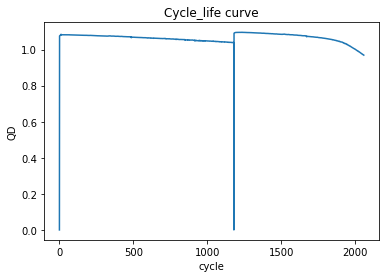

In [139]:
plt.plot((df3['cycle']),df3['QD'])
plt.xlabel('cycle')
plt.ylabel('QD')
plt.title('Cycle_life curve')
plt.show()

In [140]:
#df4 = pd.DataFrame(df2['cycles'][1])
df4 = pd.DataFrame.from_dict({(i,j): df2['cycles'][i][j] 
                           for i in df2['cycles'].keys() 
                           for j in df2['cycles'][i].keys()},
                       orient='index')

In [148]:
df4.head()

I  \
b1c0 0                                             [0, 0]   
     1  [0.0, 0.21590752727272727, 0.3598308545454545,...   
     2  [0.0, 0.2159846909090909, 0.39595430909090906,...   
     3  [0.0, 0.2157774818181818, 0.3601186909090909, ...   
     4  [0.0, 0.2160713909090909, 0.3960115272727272, ...   

                                                       Qc  \
b1c0 0                                             [0, 0]   
     1  [0.0, 1.0935055e-06, 1.0935055e-06, 1.0935055e...   
     2  [0.0, 2.1892861e-06, 2.1892861e-06, 2.1892861e...   
     3  [0.0, 3.5126993e-10, 3.5126993e-10, 3.5126993e...   
     4  [0.0, 1.4893225e-06, 1.4893225e-06, 1.4893225e...   

                                                       Qd  \
b1c0 0                                             [0, 0]   
     1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
     2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
     3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
     4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    Qdlin  \
b1c0 0                                             [0, 0]   
     1  [-0.00035743169172071344, -0.00031852458675475...   
     2  [-0.0003798085051063239, -0.000349296036017368...   
     3  [-0.00034664050996769205, -0.00030765716078066...   
     4  [-0.00037102355649936325, -0.00032921416080221...   

                                                        T  \
b1c0 0                                             [0, 0]   
     1  [31.632496, 31.632496, 31.632496, 31.632496, 3...   
     2  [31.712118, 31.642683, 31.642683, 31.642683, 3...   
     3  [31.620401, 31.618505, 31.618505, 31.618505, 3...   
     4  [31.814196, 31.814196, 31.814196, 31.814196, 3...   

                                                    Tdlin  \
b1c0 0                                             [0, 0]   
     1  [29.585882115781974, 29.585889890630046, 29.58...   
     2  [29.645995720295176, 29.645996341146088, 29.64...   
     3  [29.744202517029763, 29.744202352704704, 29.74...   
     4  [29.621225424314172, 29.62840559151371, 29.634...   

                                                        V  \
b1c0 0                                             [0, 0]   
     1  [2.0264158, 2.0393877, 2.0516596, 2.0630703, 2...   
     2  [2.0264654, 2.0391855, 2.0548534, 2.0668211, 2...   
     3  [2.0254135, 2.0385513, 2.0506926, 2.0621805, 2...   
     4  [2.0245466, 2.0373793, 2.0533218, 2.0652456, 2...   

                                                     dQdV  \
b1c0 0                                             [0, 0]   
     1  [-0.01269011993883918, -0.01269011993883918, -...   
     2  [0.0, 0.0, 0.0, -0.0001205143244502763, -9.373...   
     3  [-0.005111738067271755, -0.003948040695798245,...   
     4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00...   

                                                        t  
b1c0 0                                             [0, 0]  
     1  [0.0, 0.0024166666666739427, 0.002911666666659...  
     2  [0.0, 0.0024866666666639504, 0.002989999999984...  
     3  [0.0, 0.002541666666669092, 0.0030000000000048...  
     4  [0.0, 0.002484999999978754, 0.0030183333332994...

In [163]:
df5 =pd.DataFrame(df4['V'][10])

In [167]:
df7 =pd.DataFrame(df4['V'][100])

In [168]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1127 non-null   float64
dtypes: float64(1)
memory usage: 8.9 KB


In [166]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1133 non-null   float64
dtypes: float64(1)
memory usage: 9.0 KB


In [174]:
df6 =pd.DataFrame(df4['Qdlin'][10])

In [175]:
df8 =pd.DataFrame(df4['Qdlin'][100])

In [176]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [178]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


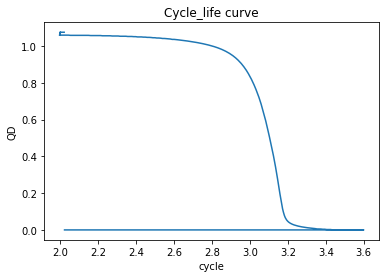

In [165]:
plt.plot(df5,df6)
plt.xlabel('cycle')
plt.ylabel('QD')
plt.title('Cycle_life curve')
plt.show()

In [142]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 107046 entries, ('b1c0', '0') to ('b3c45', '597')
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   I       107046 non-null  object
 1   Qc      107046 non-null  object
 2   Qd      107046 non-null  object
 3   Qdlin   107046 non-null  object
 4   T       107046 non-null  object
 5   Tdlin   107046 non-null  object
 6   V       107046 non-null  object
 7   dQdV    107046 non-null  object
 8   t       107046 non-null  object
dtypes: object(9)
memory usage: 7.7+ MB


In [53]:
df5 =pd.DataFrame.from_dict(df2['cycles'][1],orient='index')
df5.head()

I  \
0                                             [0, 0]   
1  [0.0, 0.21602890909090908, 0.36033977272727274...   
2  [0.0, 0.21632974545454542, 0.3601325636363636,...   
3  [0.0, 0.21543936363636362, 0.35999038181818177...   
4  [0.0, 0.21614681818181816, 0.3960531363636363,...   

                                                  Qc  \
0                                             [0, 0]   
1  [0.0, 1.0401919e-06, 1.0401919e-06, 1.0401919e...   
2  [0.0, 3.5276736e-07, 3.5276736e-07, 3.5276736e...   
3  [0.0, 1.8793604e-07, 1.8793604e-07, 1.8793604e...   
4  [0.0, 6.6333797e-07, 6.6333797e-07, 6.6333797e...   

                                                  Qd  \
0                                             [0, 0]   
1  [0.0, 6.3991529e-10, 6.3991529e-10, 6.3991529e...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 2.4583597e-11, 2.4583597e-11, 2.4583597e...   

                                               Qdlin  \
0                                             [0, 0]   
1  [-0.00046002902923157347, -0.00041831149006520...   
2  [-0.0003518966569816492, -0.000313715966774919...   
3  [-0.00045113316956579385, -0.00040434245759732...   
4  [-0.00023036501782671223, -0.00020077655709648...   

                                                   T  \
0                                             [0, 0]   
1  [31.376623, 31.376623, 31.376623, 31.376623, 3...   
2  [31.44318, 31.44318, 31.44318, 31.44318, 31.44...   
3  [31.376719, 31.376719, 31.376719, 31.376719, 3...   
4  [31.662319, 31.662319, 31.662319, 31.662319, 3...   

                                               Tdlin  \
0                                             [0, 0]   
1  [29.917041938075034, 29.917042448004786, 29.91...   
2  [29.90128737535358, 29.901287871729608, 29.901...   
3  [30.163060750380108, 30.163060813993535, 30.16...   
4  [29.966500968471895, 29.966500987895298, 29.96...   

                                                   V  \
0                                             [0, 0]   
1  [2.0220623, 2.0347204, 2.0466299, 2.0618315, 2...   
2  [2.0222187, 2.0346594, 2.046586, 2.0615654, 2....   
3  [2.0219746, 2.0345612, 2.0463877, 2.0573339, 2...   
4  [2.0213614, 2.0338478, 2.0491171, 2.0608931, 2...   

                                                dQdV  \
0                                             [0, 0]   
1  [-0.010663352015878128, -0.010663352015878128,...   
2  [-0.0007511496830675715, -0.000751149683067571...   
3  [0.0, 0.0, -1.6360322995163285e-05, -5.6297891...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, -0.00059544509907447...   

                                                   t  
0                                             [0, 0]  
1  [0.0, 0.00265999999998409, 0.00308666666666492...  
2  [0.0, 0.002635000000009313, 0.0030583333333500...  
3  [0.0, 0.0027116666666491557, 0.003153333333314...  
4  [0.0, 0.002601666666669189, 0.0030566666666951...

In [67]:
df6 = df5.iloc[[1]]

In [68]:
df6.head()

I  \
1  [0.0, 0.21602890909090908, 0.36033977272727274...   

                                                  Qc  \
1  [0.0, 1.0401919e-06, 1.0401919e-06, 1.0401919e...   

                                                  Qd  \
1  [0.0, 6.3991529e-10, 6.3991529e-10, 6.3991529e...   

                                               Qdlin  \
1  [-0.00046002902923157347, -0.00041831149006520...   

                                                   T  \
1  [31.376623, 31.376623, 31.376623, 31.376623, 3...   

                                               Tdlin  \
1  [29.917041938075034, 29.917042448004786, 29.91...   

                                                   V  \
1  [2.0220623, 2.0347204, 2.0466299, 2.0618315, 2...   

                                                dQdV  \
1  [-0.010663352015878128, -0.010663352015878128,...   

                                                   t  
1  [0.0, 0.00265999999998409, 0.00308666666666492...

In [124]:
df6.keys()

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2046', '2047', '2048', '2049', '2050', '2051', '2052', '2053', '2054',
       '2055'],
      dtype='object', length=2056)

In [74]:
df6 = df5.transpose()

In [75]:
df6.head()

0                                                  1  \
I      [0, 0]  [0.0, 0.21602890909090908, 0.36033977272727274...   
Qc     [0, 0]  [0.0, 1.0401919e-06, 1.0401919e-06, 1.0401919e...   
Qd     [0, 0]  [0.0, 6.3991529e-10, 6.3991529e-10, 6.3991529e...   
Qdlin  [0, 0]  [-0.00046002902923157347, -0.00041831149006520...   
T      [0, 0]  [31.376623, 31.376623, 31.376623, 31.376623, 3...   

                                                       2  \
I      [0.0, 0.21632974545454542, 0.3601325636363636,...   
Qc     [0.0, 3.5276736e-07, 3.5276736e-07, 3.5276736e...   
Qd     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qdlin  [-0.0003518966569816492, -0.000313715966774919...   
T      [31.44318, 31.44318, 31.44318, 31.44318, 31.44...   

                                                       3  \
I      [0.0, 0.21543936363636362, 0.35999038181818177...   
Qc     [0.0, 1.8793604e-07, 1.8793604e-07, 1.8793604e...   
Qd     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qdlin  [-0.00045113316956579385, -0.00040434245759732...   
T      [31.376719, 31.376719, 31.376719, 31.376719, 3...   

                                                       4  \
I      [0.0, 0.21614681818181816, 0.3960531363636363,...   
Qc     [0.0, 6.6333797e-07, 6.6333797e-07, 6.6333797e...   
Qd     [0.0, 2.4583597e-11, 2.4583597e-11, 2.4583597e...   
Qdlin  [-0.00023036501782671223, -0.00020077655709648...   
T      [31.662319, 31.662319, 31.662319, 31.662319, 3...   

                                                       5  \
I      [0.0, 0.21553472727272727, 0.3960869545454545,...   
Qc     [0.0, 2.0988919e-06, 2.0988919e-06, 2.0988919e...   
Qd     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qdlin  [-0.00016822556932145384, -0.00014070135863444...   
T      [31.506735, 31.506735, 31.506735, 31.506735, 3...   

                                                       6  \
I      [0.0, 0.2517726181818181, 0.39565086363636365,...   
Qc     [0.0, 2.2481204e-06, 2.2481204e-06, 2.2481204e...   
Qd     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qdlin  [-0.00044739347319690313, -0.00039989921681850...   
T      [31.543129, 31.543129, 31.543129, 31.543129, 3...   

                                                       7  \
I      [0.0, 0.21572286363636362, 0.35990281818181813...   
Qc     [0.0, 7.3149573e-07, 7.3149573e-07, 7.3149573e...   
Qd     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qdlin  [-0.00032817254075981323, -0.00029001084862269...   
T      [31.491503, 31.491503, 31.477415, 31.477415, 3...   

                                                       8  \
I      [0.0, 0.21600723636363636, 0.3598828727272727,...   
Qc     [0.0, 1.1704684e-06, 1.1704684e-06, 1.1704684e...   
Qd     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qdlin  [-0.00036068415055856714, -0.00032015691261175...   
T      [31.664892, 31.664892, 31.664892, 31.664892, 3...   

                                                       9  ...  \
I      [0.0, 0.2158511727272727, 0.3599218909090909, ...  ...   
Qc     [0.0, 1.4786981e-06, 1.4786981e-06, 1.4786981e...  ...   
Qd     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
Qdlin  [-0.0001583941351985157, -0.000131651341970177...  ...   
T      [31.822891, 31.794729, 31.794729, 31.794729, 3...  ...   

                                                    2046  \
I      [0.0, 0.26821483636363636, 0.26821483636363636...   
Qc     [0.0, 7.1290282e-07, 7.1290282e-07, 7.1290282e...   
Qd     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qdlin  [-0.0007434677925563632, -0.000683078886506061...   
T      [32.090336, 32.090336, 32.092445, 32.092445, 3...   

                                                    2047  \
I      [0.0, 0.21352594545454542, 0.37775906363636363...   
Qc     [0.0, 6.2604187e-07, 6.2604187e-07, 6.0565526e...   
Qd     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qdlin  [-0.00041244126042521963, -0.00037230163031282...   
T      [31.942596, 31.94

In [76]:
df6['1']

I        [0.0, 0.21602890909090908, 0.36033977272727274...
Qc       [0.0, 1.0401919e-06, 1.0401919e-06, 1.0401919e...
Qd       [0.0, 6.3991529e-10, 6.3991529e-10, 6.3991529e...
Qdlin    [-0.00046002902923157347, -0.00041831149006520...
T        [31.376623, 31.376623, 31.376623, 31.376623, 3...
Tdlin    [29.917041938075034, 29.917042448004786, 29.91...
V        [2.0220623, 2.0347204, 2.0466299, 2.0618315, 2...
dQdV     [-0.010663352015878128, -0.010663352015878128,...
t        [0.0, 0.00265999999998409, 0.00308666666666492...
Name: 1, dtype: object

In [77]:
df7 = pd.DataFrame(df6['1'])

In [85]:
df8 = df7.explode('1')

IndexError: list index out of range

In [90]:
df8.groupby(level = 0, axis = 1).first() 

1
I    0.000000
I    0.216029
I    0.360340
I    0.504169
I    0.647676
..        ...
t   54.361180
t   54.368428
t   54.369505
t   54.377823
t   54.386215

[9546 rows x 1 columns]

In [83]:
df9 =df8.transpose()

In [84]:
df9.head()

I         I        I         I         I         I         I         I  \
1  0  0.216029  0.36034  0.504169  0.647676  0.718816  0.792027  0.899797   

        I        I  ...        t       t       t        t        t        t  \
1  1.0079  1.07974  ...  54.0277  54.111  54.111  54.1944  54.2778  54.3612   

         t        t        t        t  
1  54.3684  54.3695  54.3778  54.3862  

[1 rows x 9546 columns]

In [116]:
df10 = df9[df9.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [122]:
df10 = pd.DataFrame(df9.groupby(level = 0, axis = 1).first())

In [123]:
df10.head()

I   Qc   Qd    Qdlin          T      Tdlin         V      dQdV    t
1  0.0  0.0  0.0 -0.00046  31.376623  29.917042  2.022062 -0.010663  0.0

In [106]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 1 to 1
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       1 non-null      float64
 1   Qc      1 non-null      float64
 2   Qd      1 non-null      float64
 3   Qdlin   1 non-null      float64
 4   T       1 non-null      float64
 5   Tdlin   1 non-null      float64
 6   V       1 non-null      float64
 7   dQdV    1 non-null      float64
 8   t       1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


ValueError: setting an array element with a sequence.

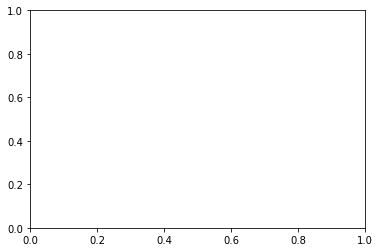

In [70]:
plt.plot((df6['Qd']),df6['V'])
plt.xlabel('Qd')
plt.ylabel('V')
plt.title('Cycle_life curve')
plt.show()

In [44]:
df5 = df4.transpose()

In [50]:
df5.head()

I  \
0                                             [0, 0]   
1  [0.0, 0.21602890909090908, 0.36033977272727274...   
2  [0.0, 0.21632974545454542, 0.3601325636363636,...   
3  [0.0, 0.21543936363636362, 0.35999038181818177...   
4  [0.0, 0.21614681818181816, 0.3960531363636363,...   

                                                  Qc  \
0                                             [0, 0]   
1  [0.0, 1.0401919e-06, 1.0401919e-06, 1.0401919e...   
2  [0.0, 3.5276736e-07, 3.5276736e-07, 3.5276736e...   
3  [0.0, 1.8793604e-07, 1.8793604e-07, 1.8793604e...   
4  [0.0, 6.6333797e-07, 6.6333797e-07, 6.6333797e...   

                                                  Qd  \
0                                             [0, 0]   
1  [0.0, 6.3991529e-10, 6.3991529e-10, 6.3991529e...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 2.4583597e-11, 2.4583597e-11, 2.4583597e...   

                                               Qdlin  \
0                                             [0, 0]   
1  [-0.00046002902923157347, -0.00041831149006520...   
2  [-0.0003518966569816492, -0.000313715966774919...   
3  [-0.00045113316956579385, -0.00040434245759732...   
4  [-0.00023036501782671223, -0.00020077655709648...   

                                                   T  \
0                                             [0, 0]   
1  [31.376623, 31.376623, 31.376623, 31.376623, 3...   
2  [31.44318, 31.44318, 31.44318, 31.44318, 31.44...   
3  [31.376719, 31.376719, 31.376719, 31.376719, 3...   
4  [31.662319, 31.662319, 31.662319, 31.662319, 3...   

                                               Tdlin  \
0                                             [0, 0]   
1  [29.917041938075034, 29.917042448004786, 29.91...   
2  [29.90128737535358, 29.901287871729608, 29.901...   
3  [30.163060750380108, 30.163060813993535, 30.16...   
4  [29.966500968471895, 29.966500987895298, 29.96...   

                                                   V  \
0                                             [0, 0]   
1  [2.0220623, 2.0347204, 2.0466299, 2.0618315, 2...   
2  [2.0222187, 2.0346594, 2.046586, 2.0615654, 2....   
3  [2.0219746, 2.0345612, 2.0463877, 2.0573339, 2...   
4  [2.0213614, 2.0338478, 2.0491171, 2.0608931, 2...   

                                                dQdV  \
0                                             [0, 0]   
1  [-0.010663352015878128, -0.010663352015878128,...   
2  [-0.0007511496830675715, -0.000751149683067571...   
3  [0.0, 0.0, -1.6360322995163285e-05, -5.6297891...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, -0.00059544509907447...   

                                                   t  
0                                             [0, 0]  
1  [0.0, 0.00265999999998409, 0.00308666666666492...  
2  [0.0, 0.002635000000009313, 0.0030583333333500...  
3  [0.0, 0.0027116666666491557, 0.003153333333314...  
4  [0.0, 0.002601666666669189, 0.0030566666666951...

In [80]:
df5['V'][2]

array([2.0222187, 2.0346594, 2.046586 , ..., 2.0021753, 2.0122242,
       2.020772 ])

In [84]:
len(df5['Qd'][2])

1119

In [52]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2056 entries, 0 to 2055
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   I       2056 non-null   object
 1   Qc      2056 non-null   object
 2   Qd      2056 non-null   object
 3   Qdlin   2056 non-null   object
 4   T       2056 non-null   object
 5   Tdlin   2056 non-null   object
 6   V       2056 non-null   object
 7   dQdV    2056 non-null   object
 8   t       2056 non-null   object
dtypes: object(9)
memory usage: 240.6+ KB


In [54]:
df6 = pd.DataFrame(df5['Qd'][1])

In [64]:
df5.to_excel('C:/Users/satsin/Desktop/Battery life/cycle.xlsx')

In [66]:
df5.keys()

Index(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'dQdV', 't'], dtype='object')

In [72]:
df6 = []
for i in df5.keys():
    df6.append((df5[i][1]))

In [68]:
df6

[array([ 0.        ,  0.21602891,  0.36033977, ..., -0.02976504,
        -0.02976504,  0.        ]),
 array([0.0000000e+00, 1.0401919e-06, 1.0401919e-06, ..., 1.0750588e+00,
        1.0750588e+00, 1.0750588e+00]),
 array([0.0000000e+00, 6.3991529e-10, 6.3991529e-10, ..., 1.0753012e+00,
        1.0753012e+00, 1.0753012e+00]),
 array([-4.60029029e-04, -4.18311490e-04, -3.78267329e-04, -3.39760519e-04,
        -3.02655034e-04, -2.66814849e-04, -2.32103937e-04, -1.98386272e-04,
        -1.65525828e-04, -1.33386579e-04, -1.01832499e-04, -7.07275611e-05,
        -3.99357398e-05, -9.32100884e-06,  2.12526579e-05,  5.19212866e-05,
         8.28209033e-05,  1.14087534e-04,  1.45857205e-04,  1.78265943e-04,
         2.11449772e-04,  2.45509130e-04,  2.80415455e-04,  3.16110962e-04,
         3.52537867e-04,  3.89638384e-04,  4.27354728e-04,  4.65629442e-04,
         5.04440503e-04,  5.43832674e-04,  5.83858116e-04,  6.24568988e-04,
         6.66017451e-04,  7.08255664e-04,  7.51334268e-04,  7.952

In [69]:
df7 = pd.DataFrame(df6)

In [70]:
df7.head()

0             1             2             3             4     \
0   0.000000  2.160289e-01  3.603398e-01  5.041695e-01  6.476758e-01   
1   0.000000  1.040192e-06  1.040192e-06  1.040192e-06  1.040192e-06   
2   0.000000  6.399153e-10  6.399153e-10  6.399153e-10  6.399153e-10   
3  -0.000460 -4.183115e-04 -3.782673e-04 -3.397605e-04 -3.026550e-04   
4  31.376623  3.137662e+01  3.137662e+01  3.137662e+01  3.137662e+01   

           5             6             7             8             9     ...  \
0  7.188164e-01  7.920265e-01  8.997969e-01  1.007900e+00  1.079742e+00  ...   
1  1.040192e-06  1.040192e-06  1.040192e-06  1.040192e-06  1.040192e-06  ...   
2  6.399153e-10  6.399153e-10  6.399153e-10  6.399153e-10  6.399153e-10  ...   
3 -2.668148e-04 -2.321039e-04 -1.983863e-04 -1.655258e-04 -1.333866e-04  ...   
4  3.137662e+01  3.137662e+01  3.137662e+01  3.137662e+01  3.137662e+01  ...   

        1081       1082       1083       1084       1085       1086  \
0  -0.032050  -0.030578  -0.030578  -0.030403  -0.029399  -0.029753   
1   1.075059   1.075059   1.075059   1.075059   1.075059   1.075059   
2   1.075111   1.075159   1.075159   1.075206   1.075252   1.075297   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  31.512480  31.512480  31.482405  31.495541  31.476334  31.443180   

        1087       1088       1089       1090  
0  -0.029765  -0.029765  -0.029765   0.000000  
1   1.075059   1.075059   1.075059   1.075059  
2   1.075301   1.075301   1.075301   1.075301  
3        NaN        NaN        NaN        NaN  
4  31.443180  31.443180  31.443180  31.443180  

[5 rows x 1091 columns]